In [ ]:
# Geospatial Data Analysis
# Data analysis on vector shape file
#Municipality data of Nepal  #Geodev youtube tutorials

In [1]:
import geopandas as gpd
from rasterio import plot
import matplotlib.pyplot as plt

In [2]:
shp_data=gpd.read_file('F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\shp\municipality.shp')

In [3]:
shp_data.head()

,OBJECTID,DISTRICT,GaPa_NaPa,Type_GN,Province,SCode,DCode,SDD,MCode,length,area,SDDMM,Nepali,Shape_Leng,Shape_Area,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,1,1,101,1,44.672747,88.825948,10101,à¤à¤ à¤°à¤¾à¤ à¤¤à¥à¤°à¤¿à¤µà¥à¤£à¥,0.430900,0.008075,"POLYGON ((87.60718 27.37074, 87.60840 27.36974..."
1,2,TAPLEJUNG,Maiwakhola,Gaunpalika,1,1,1,101,2,61.067429,137.848122,10102,à¤®à¥à¤µà¤¾à¤à¥à¤²à¤¾,0.577692,0.012540,"POLYGON ((87.50136 27.42931, 87.50406 27.42861..."
2,3,TAPLEJUNG,Meringden,Gaunpalika,1,1,1,101,3,75.987469,210.313039,10103,à¤®à¥à¤°à¤¿à¤à¤¦à¥à¤¨,0.718499,0.019148,"POLYGON ((87.51006 27.56923, 87.50928 27.56793..."
3,4,TAPLEJUNG,Mikwakhola,Gaunpalika,1,1,1,101,4,123.175400,442.960328,10104,à¤®à¤¿à¤à¥à¤µà¤¾à¤à¥à¤²à¤¾,1.164097,0.040365,"POLYGON ((87.68623 27.70966, 87.68668 27.70899..."
4,5,TAPLEJUNG,Phaktanglung,Gaunpalika,1,1,1,101,5,228.107830,1858.441119,10105,à¤«à¤à¥à¤¤à¤¾à¤à¤²à¥à¤,2.186142,0.169452,"POLYGON ((87.83464 27.95145, 87.83568 27.95148..."


In [4]:
shp_data.columns

Index(['OBJECTID', 'DISTRICT', 'GaPa_NaPa', 'Type_GN', 'Province', 'SCode',
       'DCode', 'SDD', 'MCode', 'length', 'area', 'SDDMM', 'Nepali',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [5]:
shp_data.shape

(774, 16)

In [6]:
shp_data.dtypes

OBJECTID         int64
DISTRICT        object
GaPa_NaPa       object
Type_GN         object
Province        object
SCode            int64
DCode            int64
SDD              int64
MCode            int64
length         float64
area           float64
SDDMM            int64
Nepali          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [11]:
#To know the type of geometry (either point or line oy polygon)
shp_data.geom_type

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
769    Polygon
770    Polygon
771    Polygon
772    Polygon
773    Polygon
Length: 774, dtype: object

In [10]:
shp_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
###Visualising the vector data

<Axes: >

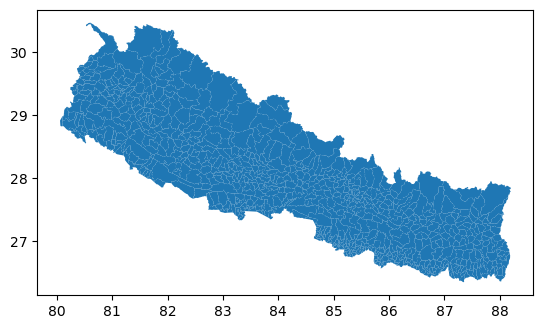

In [12]:
shp_data.plot()

<Axes: >

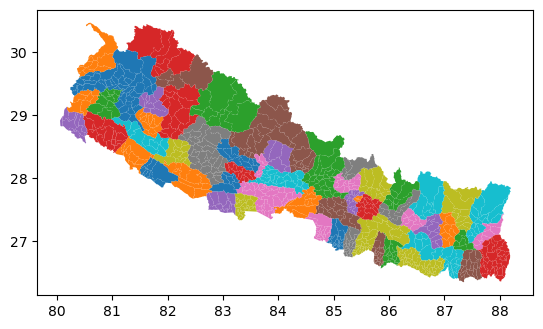

In [13]:
#To change the color the plot based on certain column
shp_data.plot("DISTRICT")

<Axes: >

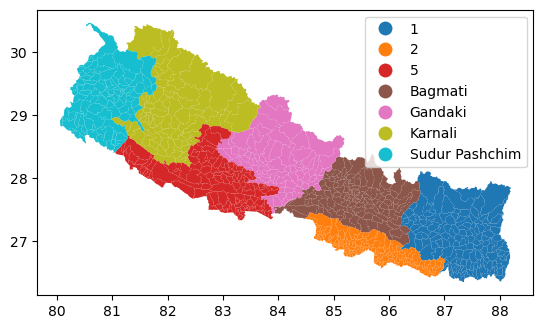

In [14]:
#Lets visualise the data based on province
shp_data.plot('Province', legend=True)

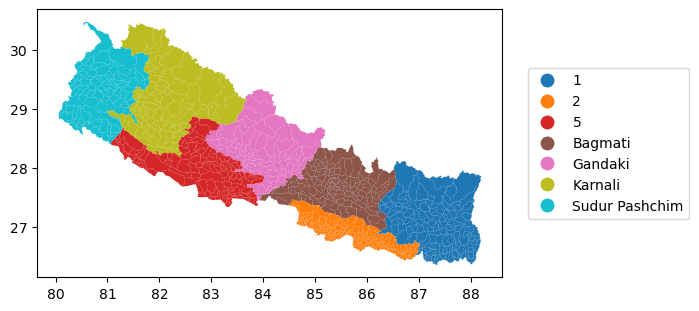

In [20]:
#To change the legend position use matplotlib
fig, ax=plt.subplots(1,figsize=(6,6))
shp_data.plot(ax=ax, column='Province', legend=True, legend_kwds={"loc":"center left"})
#First get legend to get shift it to desired location
leg=ax.get_legend()
leg.set_bbox_to_anchor((1.04,0.5)) ##it will shift 0.5 units from right side y axis; and down by 1.04 units

In [21]:
###Writing vector data
#Create a folder for outputs
# save output in .shp file
shp_data.to_file(r'F:\python\RS_GIS_Python\Output\shp_data.shp')


In [22]:
#Saving data in geojson format
shp_data.to_file(r'F:\python\RS_GIS_Python\Output\out_shp_data.geojson', driver='GeoJSON', encoding='utf-8')

In [23]:
#saving data in geopackage
shp_data.to_file(r'F:\python\RS_GIS_Python\Output\out_shp_data_geopackage.gpkg', layer='m',driver='GPKG', encoding='utf-8')

In [21]:
##Basics:
districts=gpd.read_file(r'F:\python\RS_GIS_Python\Shapefiles\districts.shp')
districts.head()

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."


<Axes: >

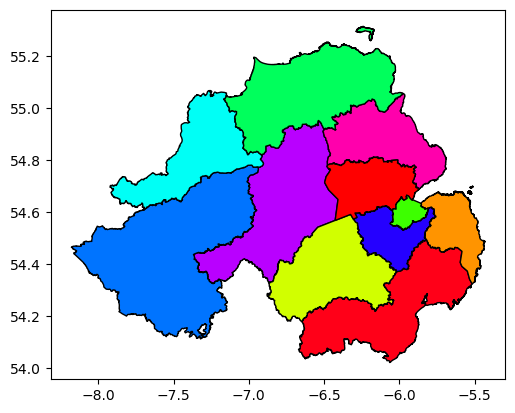

In [3]:
districts.plot(cmap='hsv',column='district',edgecolor='black')

In [4]:
AOI=gpd.read_file(r'F:\python\RS_GIS_Python\Shapefiles\area_of_interest.shp')
AOI.head()

,Id,geometry
0,0,"POLYGON ((-7.10243 54.53227, -7.10175 54.53254..."


<Axes: >

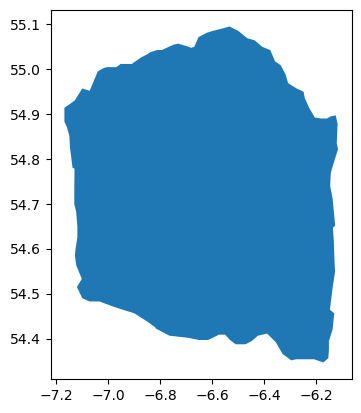

In [5]:
AOI.plot()

<Axes: >

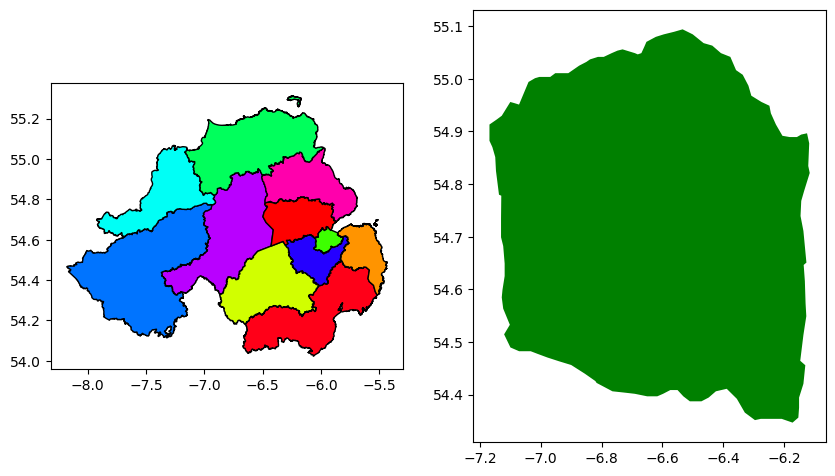

In [6]:
#plot the figures side by side
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8))
districts.plot(ax=ax1,cmap='hsv',edgecolor='black',column='district')
AOI.plot(ax=ax2,color='green')

<Axes: >

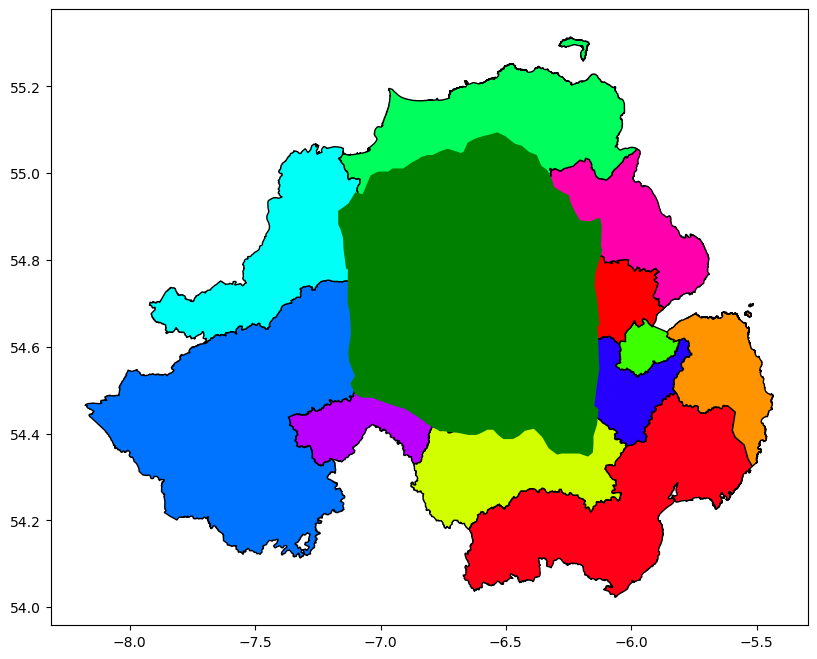

In [7]:
#plot the figures over the other as layers
fig,ax=plt.subplots(figsize=(10,8))
districts.plot(ax=ax,cmap='hsv',edgecolor='black',column='district')
AOI.plot(ax=ax,color='green')

<Axes: >

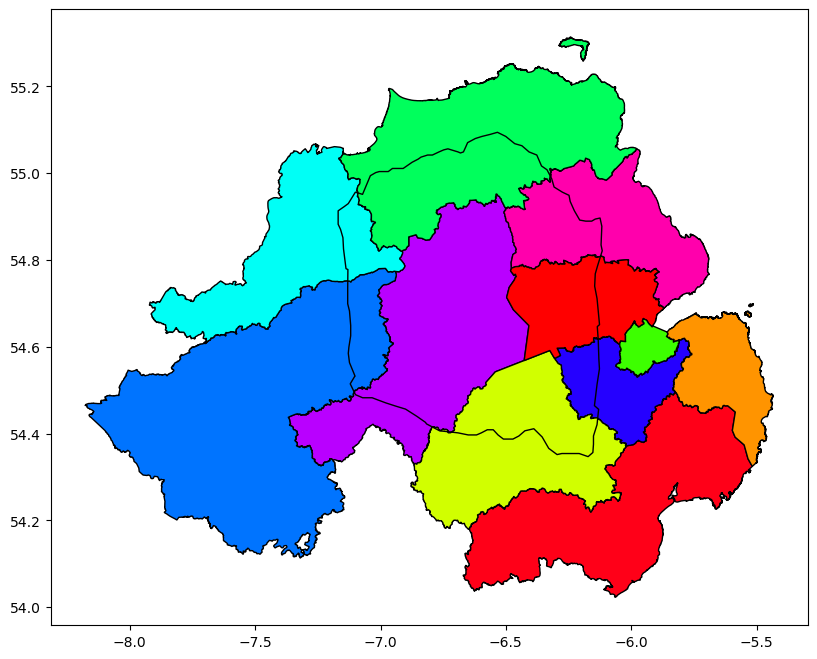

In [8]:
#plot the figures over the other to see the Area of interest
fig,ax=plt.subplots(figsize=(10,8))
districts.plot(ax=ax,cmap='hsv',edgecolor='black',column='district')
AOI.plot(ax=ax,color='none',edgecolor='black')

In [10]:
atms=gpd.read_file(r'F:\python\RS_GIS_Python\Shapefiles\atms.shp')
atms.head()

,operator,geometry
0,Northern Bank,MULTIPOINT (-6.65841 54.50122)
1,NaN,MULTIPOINT (-6.22666 54.72956)
2,Bank of Ireland,MULTIPOINT (-6.22038 54.80819)
3,NaN,MULTIPOINT (-6.29858 54.43323)
4,NaN,MULTIPOINT (-6.21401 54.59141)


<Axes: >

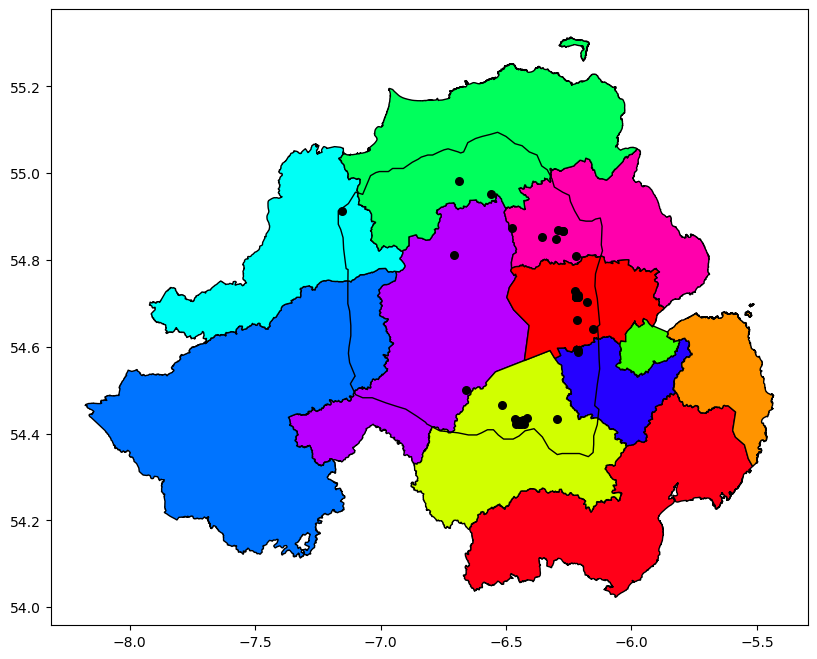

In [16]:
#Lets plot districts, AOI and atms as layers
fig,ax=plt.subplots(figsize=(10,8))
districts.plot(ax=ax,cmap='hsv',edgecolor='black',column='district')
AOI.plot(ax=ax,color='none',edgecolor='black')
atms.plot(ax=ax,color='black',markersize=30)

In [17]:
#working on coordinate system
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
atms.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

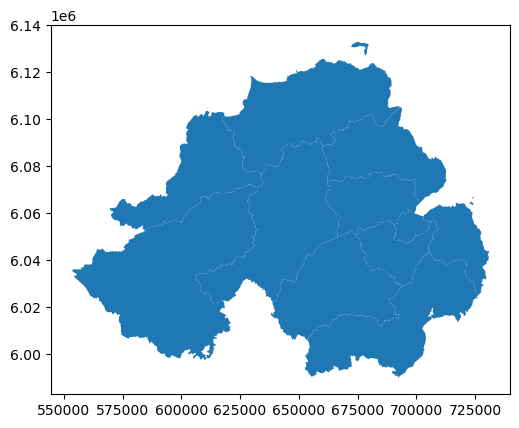

In [22]:
#Reprojections
districts_reproject=districts.to_crs(epsg=32629)
districts_reproject.plot()
#units have changed 

<Axes: >

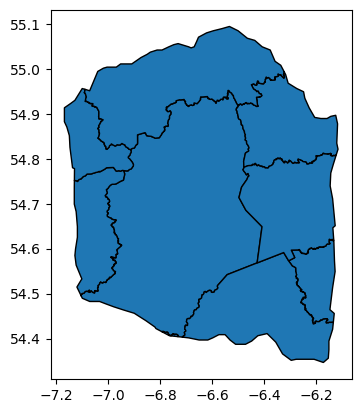

In [24]:
#Intersecting layers
districts_in_aoi=gpd.overlay(districts, AOI,how='intersection')
districts_in_aoi.plot(edgecolor='black')

In [28]:
#Calculating the area of the intersected layer
#To calculate area districts, aoi is reprojected to utm
districts_reproject=districts.to_crs(epsg=32629)
aoi_reprojected=AOI.to_crs(epsg=32629)

<Axes: >

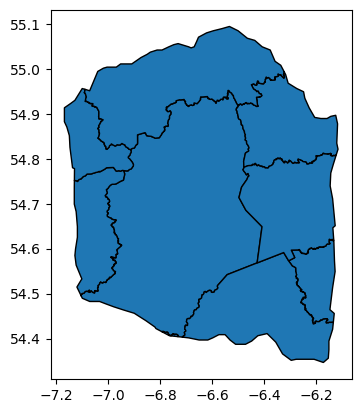

In [30]:
#Intersecting layers
districts_in_aoi_reproj=gpd.overlay(districts_reproject, aoi_reprojected,how='intersection')
districts_in_aoi_reproj.plot(edgecolor='black')

In [33]:
#Creating a area column and assign area values
#since we r working in utm, units are in sq.m. To convert it to sq.km, divide sq.m /10^6
districts_in_aoi_reproj['area_sq_m']=districts_in_aoi_reproj.area #sq.m
districts_in_aoi_reproj.head()

,district,Id,geometry,area,area_sq_m
0,Mid Ulster,0,"POLYGON ((658023.630 6091903.404, 658030.243 6...",1.574420e+09,1.574420e+09
1,Mid and East Antrim,0,"POLYGON ((684908.771 6077240.941, 684903.541 6...",3.736911e+08,3.736911e+08
2,Lisburn and Castlereagh,0,"POLYGON ((685894.090 6035737.164, 685891.166 6...",1.517379e+08,1.517379e+08
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((676033.306 6048080.158, 676033...",5.539328e+08,5.539328e+08
4,Antrim and Newtownabbey,0,"POLYGON ((682239.947 6077405.626, 682246.748 6...",4.628229e+08,4.628229e+08


In [34]:
districts_in_aoi_reproj['area_sq_km']=districts_in_aoi_reproj.area/1000000 #sq.km
districts_in_aoi_reproj.head()

,district,Id,geometry,area,area_sq_m,area_sq_km
0,Mid Ulster,0,"POLYGON ((658023.630 6091903.404, 658030.243 6...",1.574420e+09,1.574420e+09,1574.420076
1,Mid and East Antrim,0,"POLYGON ((684908.771 6077240.941, 684903.541 6...",3.736911e+08,3.736911e+08,373.691057
2,Lisburn and Castlereagh,0,"POLYGON ((685894.090 6035737.164, 685891.166 6...",1.517379e+08,1.517379e+08,151.737874
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((676033.306 6048080.158, 676033...",5.539328e+08,5.539328e+08,553.932816
4,Antrim and Newtownabbey,0,"POLYGON ((682239.947 6077405.626, 682246.748 6...",4.628229e+08,4.628229e+08,462.822918


In [35]:
#Exporting the geopandas geodataframe into ESRI shapefile
#As path for destination is not provided the resultant shape file is stored in the present working directory (C drive)
districts_in_aoi_reproj.to_file('districts within aoi.shp',driver='ESRI Shapefile')